## X-Ray image classification

In [12]:
# importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

## Data cleaning
###### For the purpose of data cleaning we first load the directories of the the images into data frames.

In [13]:
base_directory = '/Users/adityanaik/Desktop/Data-2'
train_directory = os.path.join(base_directory, 'train')
test_directory = os.path.join(base_directory, 'test')

# FOR TRAINING DATA
# Directory with our normal images
normal_images = os.path.join(train_directory, 'NORMAL')
# Directory with our covid images
covid_images = os.path.join(train_directory, 'COVID19')
# Directory with our pneumonia images
pneumonia_images = os.path.join(train_directory, 'PNEUMONIA')

# FOR TESTING DATA
# Directory with our normal images
normal_images_test = os.path.join(test_directory, 'NORMAL')
# Directory with our covid images
covid_images_test = os.path.join(test_directory, 'COVID19')
# Directory with our pneumonia images
pneumonia_images_test = os.path.join(test_directory, 'PNEUMONIA')

##### The directories loaded into the dataframe are then provided with their corresponding labels depending on the name of the folder they are in

In [14]:
# FOR TRAINING DATA
for d in [normal_images, covid_images, pneumonia_images]:
    temp = []
    for dirname, _, filenames in os.walk(d):
        for filename in filenames:
            temp.append(os.path.join(dirname, filename))
    if d == normal_images:
        df_normal = pd.DataFrame(temp)
    if d == covid_images:
        df_covid = pd.DataFrame(temp)
    if d == pneumonia_images:
        df_pneumonia = pd.DataFrame(temp)

# FOR TESTING DATA
for d in [normal_images_test, covid_images_test, pneumonia_images_test]:
    temp = []
    for dirname, _, filenames in os.walk(d):
        for filename in filenames:
            temp.append(os.path.join(dirname, filename))
    if d == normal_images_test:
        df_normal_test = pd.DataFrame(temp)
    if d == covid_images_test:
        df_covid_test = pd.DataFrame(temp)
    if d == pneumonia_images_test:
        df_pneumonia_test = pd.DataFrame(temp)

##### Displaying the first 10 names of the files in each folder in the training data folder

In [15]:
normal_files = os.listdir(normal_images)
print(normal_files[:10])

covid_files = os.listdir(covid_images)
print(covid_files[:10])

pneumonia_files = os.listdir(pneumonia_images)
print(pneumonia_files[:10])

['NORMAL(272).jpg', 'NORMAL(788).jpg', 'NORMAL(622).jpg', 'NORMAL(1138).jpg', 'NORMAL(1092).jpg', 'NORMAL(337).jpg', 'NORMAL(767).jpg', 'NORMAL(1211).jpg', 'NORMAL(858).jpg', 'NORMAL(675).jpg']
['COVID19(309).jpg', 'COVID19(165).jpg', 'COVID19(92).jpg', 'COVID19(427).jpg', 'COVID19(132).jpg', 'COVID19(348).jpg', 'COVID19(431).jpg', 'COVID19(84).jpg', 'COVID19(124).jpg', 'COVID19(173).jpg']
['PNEUMONIA(1068).jpg', 'PNEUMONIA(3055).jpg', 'PNEUMONIA(1592).jpg', 'PNEUMONIA(1438).jpg', 'PNEUMONIA(3405).jpg', 'PNEUMONIA(694).jpg', 'PNEUMONIA(2644).jpg', 'PNEUMONIA(2214).jpg', 'PNEUMONIA(2701).jpg', 'PNEUMONIA(1984).jpg']


##### Displaying two X-ray images from each category in the training set

/Users/adityanaik/Desktop/Data-2/train/NORMAL/NORMAL(622).jpg
(1160, 1453, 3)


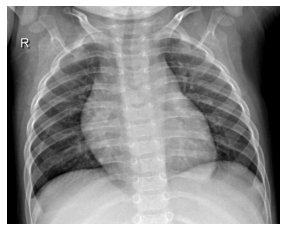

/Users/adityanaik/Desktop/Data-2/train/NORMAL/NORMAL(1138).jpg
(1468, 1708, 3)


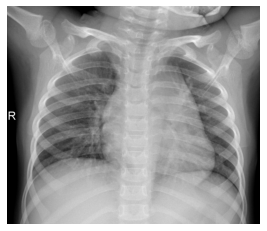

/Users/adityanaik/Desktop/Data-2/train/COVID19/COVID19(92).jpg
(2195, 2200, 3)


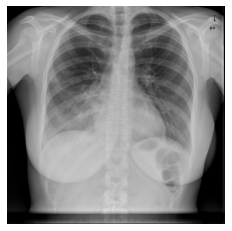

/Users/adityanaik/Desktop/Data-2/train/COVID19/COVID19(427).jpg
(2336, 2836, 3)


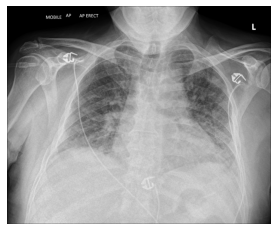

/Users/adityanaik/Desktop/Data-2/train/PNEUMONIA/PNEUMONIA(1592).jpg
(888, 1032, 3)


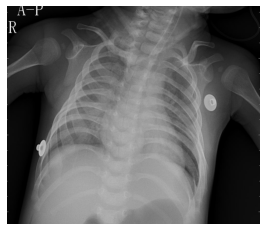

/Users/adityanaik/Desktop/Data-2/train/PNEUMONIA/PNEUMONIA(1438).jpg
(1176, 1552, 3)


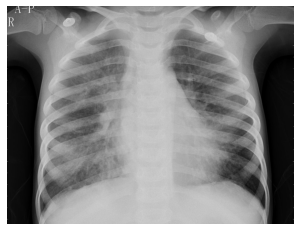

In [269]:
# Displaying images of each category using matplotlib
pic_index = 4

normal = [os.path.join(normal_images, fname) 
                for fname in normal_files[pic_index-2:pic_index]]
covid = [os.path.join(covid_images, fname) 
                for fname in covid_files[pic_index-2:pic_index]]
pneumonia = [os.path.join(pneumonia_images, fname) 
                for fname in pneumonia_files[pic_index-2:pic_index]]

for i, img_path in enumerate(normal+covid+pneumonia):
    print(img_path)
    img = mpimg.imread(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

#### Figure 1 (X-ray images of normal, covid19 and pneumonia)

In [17]:
# Normal images training data
df_normal.rename(columns = {0:'images'}, inplace = True)
df_normal['target'] = 'NORMAL'
df_normal.head()

,images,target
0,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
1,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
2,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
3,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
4,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL


In [18]:
# Normal images test data
df_normal_test.rename(columns = {0:'images'}, inplace = True)
df_normal_test['target'] = 'NORMAL'
df_normal_test.head()

,images,target
0,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL
1,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL
2,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL
3,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL
4,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL


In [19]:
# Covid images training data
df_covid.rename(columns = {0:'images'}, inplace = True)
df_covid['target'] = 'COVID19'
df_covid.head()

,images,target
0,/Users/adityanaik/Desktop/Data-2/train/COVID19...,COVID19
1,/Users/adityanaik/Desktop/Data-2/train/COVID19...,COVID19
2,/Users/adityanaik/Desktop/Data-2/train/COVID19...,COVID19
3,/Users/adityanaik/Desktop/Data-2/train/COVID19...,COVID19
4,/Users/adityanaik/Desktop/Data-2/train/COVID19...,COVID19


In [20]:
# Covid images test data
df_covid_test.rename(columns = {0:'images'}, inplace = True)
df_covid_test['target'] = 'COVID19'
df_covid_test.head()

,images,target
0,/Users/adityanaik/Desktop/Data-2/test/COVID19/...,COVID19
1,/Users/adityanaik/Desktop/Data-2/test/COVID19/...,COVID19
2,/Users/adityanaik/Desktop/Data-2/test/COVID19/...,COVID19
3,/Users/adityanaik/Desktop/Data-2/test/COVID19/...,COVID19
4,/Users/adityanaik/Desktop/Data-2/test/COVID19/...,COVID19


In [21]:
# Pneumonia images training data
df_pneumonia.rename(columns = {0:'images'}, inplace = True)
df_pneumonia['target'] = 'PNEUMONIA'
df_pneumonia.head()

,images,target
0,/Users/adityanaik/Desktop/Data-2/train/PNEUMON...,PNEUMONIA
1,/Users/adityanaik/Desktop/Data-2/train/PNEUMON...,PNEUMONIA
2,/Users/adityanaik/Desktop/Data-2/train/PNEUMON...,PNEUMONIA
3,/Users/adityanaik/Desktop/Data-2/train/PNEUMON...,PNEUMONIA
4,/Users/adityanaik/Desktop/Data-2/train/PNEUMON...,PNEUMONIA


In [22]:
# Pneumonia images test data
df_pneumonia_test.rename(columns = {0:'images'}, inplace = True)
df_pneumonia_test['target'] = 'PNEUMONIA'
df_pneumonia_test.head()

,images,target
0,/Users/adityanaik/Desktop/Data-2/test/PNEUMONI...,PNEUMONIA
1,/Users/adityanaik/Desktop/Data-2/test/PNEUMONI...,PNEUMONIA
2,/Users/adityanaik/Desktop/Data-2/test/PNEUMONI...,PNEUMONIA
3,/Users/adityanaik/Desktop/Data-2/test/PNEUMONI...,PNEUMONIA
4,/Users/adityanaik/Desktop/Data-2/test/PNEUMONI...,PNEUMONIA


In [23]:
print('No. of training images of Normal X-rays: ', len(df_normal))
print('No. of training images of Covid X-rays: ', len(df_covid))
print('No. of training images of Pneumonia X-rays: ', len(df_pneumonia))

No. of training images of Normal X-rays:  1266
No. of training images of Covid X-rays:  460
No. of training images of Pneumonia X-rays:  3418


##### We see that the dataset is imbalanced with pneumonia images having the highest value and covid having the least with 460 images. We attempt to balance this out but restricting the number of images for normal and pneumonia to 460.

In [24]:
df_normal_new = df_normal.sample(460)
df_pneumonia_new = df_pneumonia.sample(460)

In [25]:
print('No. of training images of Normal X-rays: ', len(df_normal_new))
print('No. of training images of Covid X-rays: ', len(df_covid))
print('No. of training images of Pneumonia X-rays: ', len(df_pneumonia_new))

No. of training images of Normal X-rays:  460
No. of training images of Covid X-rays:  460
No. of training images of Pneumonia X-rays:  460


##### Test data

In [26]:
print('No. of test images of Normal X-rays: ', len(df_normal_test))
print('No. of test images of Covid X-rays: ', len(df_covid_test))
print('No. of test images of Pneumonia X-rays: ', len(df_pneumonia_test))

No. of test images of Normal X-rays:  317
No. of test images of Covid X-rays:  116
No. of test images of Pneumonia X-rays:  855


##### Combining the three dataframes for training and test data

In [27]:
train_data = pd.concat([df_normal_new, df_covid, df_pneumonia_new], axis = 0)
train_data.head()

,images,target
623,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
432,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
565,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
546,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
316,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL


In [28]:
print('Number of training images: ',len(train_data))

Number of training images:  1380


In [29]:
test_data = pd.concat([df_normal_test, df_covid_test, df_pneumonia_test], axis = 0)
test_data.head()

,images,target
0,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL
1,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL
2,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL
3,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL
4,/Users/adityanaik/Desktop/Data-2/test/NORMAL/N...,NORMAL


In [30]:
print('Number of test images: ',len(test_data))

Number of test images:  1288


In [31]:
print('Number of null values in the images column for train data: ', np.count_nonzero(train_data['images'].isnull()))
print('Number of null values in the target column for train data: ', np.count_nonzero(train_data['target'].isnull()))

Number of null values in the images column for train data:  0
Number of null values in the target column for train data:  0


In [32]:
print('Number of null values in the images column for test data: ', np.count_nonzero(test_data['images'].isnull()))
print('Number of null values in the target column for test data: ', np.count_nonzero(test_data['target'].isnull()))

Number of null values in the images column for test data:  0
Number of null values in the target column for test data:  0


#### Shuffling the data

In [33]:
# Shuffling the data
np.random.RandomState(42) 
train_data = train_data.sample(frac = 1, random_state = 42)
train_data.head()

,images,target
778,/Users/adityanaik/Desktop/Data-2/train/NORMAL/...,NORMAL
88,/Users/adityanaik/Desktop/Data-2/train/COVID19...,COVID19
2245,/Users/adityanaik/Desktop/Data-2/train/PNEUMON...,PNEUMONIA
1886,/Users/adityanaik/Desktop/Data-2/train/PNEUMON...,PNEUMONIA
21,/Users/adityanaik/Desktop/Data-2/train/COVID19...,COVID19


### Image Augmentation
##### During the training process, we make use of the Image preprocessing and augmentation API of Keras known as ImageDataGenerator. The following operations were performed by the API on our data:
Rescaling: Performs min-max scaling for all pixels of each channel

Rotation: The images are rotated within a range of -10 to +10 degrees 

Lateral shift (width shift): Images are shifted laterally by 10% in either direction

Vertical shift (height shift): Images are shifted vertically by 10% in the top-down direction

Horizontal flip: Mirrored images of the original X-ray scans are taken across the vertical axis

The rescaling operation is to bring all the inputs to the same scale so as to enable the model to train faster and avoid local optima and is part of the data preprocessing and not augmentation. On the other hand, the rotation, vertical and lateral shifting and horizontal flipping are data augmentation operations. The data obtained after using these operations are treated as new data even though it was obtained by slightly modifying the original training images. This helps us remove the bias induced in our training data due to the sub-sampling discussed in the previous section. In addition to this data augmentation also acts as a regulariser as it forces the model to be more tolerant to variations in size, position and orientation of the image and makes it focus on the important features.

There are a total of 1380 training images and 1288 test images. The training data is first shuffled by using the panda's sample method with the frac parameter set to 1 which shuffles all the rows in the data frame without replacement at random. The test images are kept aside and remain untouched until the final model is trained and validated. The training data on the other hand is further divided into the training data and validation data in the 80:20 ratio. This is done by specifying the validation_split parameter as 0.2 in the ImageDataGenerator API object and subsequently specifying the subset parameter in the train_data_generator and val_data_generator objects as ‘training’ and ‘validation’ respectively. We also set the batch size for training as 32 in the train_data_generator object as larger batch sizes result in instabilities while smaller batch sizes do not exploit the power of parallel computing using GPUs. 

In [86]:
datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.10,
                                  height_shift_range = 0.10,
                                  validation_split = 0.2,
                                  horizontal_flip = True
                                  )
# Training data
train_data_generator = datagen.flow_from_dataframe(
    train_data,
    x_col = 'images',
    y_col = 'target',
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    batch_size = 32,
    shuffle = False,
    seed = 42,
    class_mode = 'sparse',
    validate_filenames = True,
    subset = 'training'
)
# Validation data
val_data_generator = datagen.flow_from_dataframe(
    train_data,
    x_col = 'images',
    y_col = 'target',
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    batch_size = 8,
    shuffle = False,
    seed = 42,
    class_mode = 'sparse',
    validate_filenames = True,
    subset = 'validation'
)

# Test data
datagen_test = ImageDataGenerator(rescale = 1./255)

test_data_generator = datagen_test.flow_from_dataframe(
    test_data,
    x_col = 'images',
    y_col = 'target',
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    batch_size = 8,
    shuffle = False,
    seed = 42,
    class_mode = 'sparse',
    validate_filenames = True,
    )

Found 1104 validated image filenames belonging to 3 classes.
Found 276 validated image filenames belonging to 3 classes.
Found 1288 validated image filenames belonging to 3 classes.


# Resnet 50

In [152]:
base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet',
                                                  include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(3, activation="softmax")(avg)
resnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

resnet_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

In [153]:
resnet_model.summary()

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_7[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

##### model 1 summary

In [154]:
tf.keras.utils.plot_model(resnet_model, "resnet_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### Train data metrics

In [271]:
resnet_model.evaluate(train_data_generator)

2022-05-10 16:27:20.294597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 33s 837ms/step - loss: 2.0646 - sparse_categorical_accuracy: 0.3324


[2.064608335494995, 0.3324275314807892]

In [272]:

y_train_pred = resnet_model.predict(train_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

2022-05-10 16:30:51.272149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [274]:
# Displaying the confusion matrix
confusion_matrix(train_data_generator.classes, y_train_pred)

array([[  0, 365,   0],
       [  0, 367,   0],
       [  0, 372,   0]])

In [275]:
p = precision_score(train_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(train_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(train_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

precision:  0.11080917874396135
recall:  0.3333333333333333
F1 score:  0.16632676184001813


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Validation data metrics

In [276]:
resnet_model.evaluate(val_data_generator)

35/35 [==============================] - 13s 299ms/step - loss: 2.0742 - sparse_categorical_accuracy: 0.3370


[2.0742337703704834, 0.33695653080940247]

In [277]:
y_val_pred = resnet_model.predict(val_data_generator)
y_val_pred = np.argmax(y_val_pred,axis=1)

In [278]:
# Displaying the confusion matrix
confusion_matrix(val_data_generator.classes, y_val_pred)

array([[ 0, 95,  0],
       [ 0, 93,  0],
       [ 0, 88,  0]])

In [279]:
p = precision_score(val_data_generator.classes, y_val_pred, average = 'macro')
r = recall_score(val_data_generator.classes, y_val_pred, average = 'macro')
f = f1_score(val_data_generator.classes, y_val_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

precision:  0.11231884057971014
recall:  0.3333333333333333
F1 score:  0.16802168021680217


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GoogLeNet (inceptionv3)

In [280]:
# Loading the pretrained inception V3 model with imagenet weights and without the top layer
pretrained_model = tf.keras.applications.InceptionV3( 
                                               weights = 'imagenet', 
                                               include_top = False)
# Instead of flatten we use global average pooling layer
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_model.output)
# Next we add the final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(avg)
# Final model
inceptionnet_model = tf.keras.models.Model(inputs=pretrained_model.input, outputs=output)

# Compiling the model
inceptionnet_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

In [281]:
inceptionnet_model.summary()

Model: "model_74"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_940 (Conv2D)            (None, None, None,   864         ['input_12[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_1035 (Batc  (None, None, None,   96         ['conv2d_940[0][0]']             
 hNormalization)                32)                                                        

##### model 2 summary

In [282]:
tf.keras.utils.plot_model(inceptionnet_model, "inception_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### Train data metrics

In [283]:
inceptionnet_model.evaluate(train_data_generator)

2022-05-10 16:34:52.807928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 34s 800ms/step - loss: 1.3880 - sparse_categorical_accuracy: 0.3216


[1.3880300521850586, 0.3215579688549042]

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = inceptionnet_model.predict(train_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

2022-05-09 17:30:49.314101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [284]:
confusion_matrix(train_data_generator.classes, y_train_pred)

array([[  0, 365,   0],
       [  0, 367,   0],
       [  0, 372,   0]])

In [285]:
p = precision_score(train_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(train_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(train_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

precision:  0.11080917874396135
recall:  0.3333333333333333
F1 score:  0.16632676184001813


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Validation data metrics

In [286]:
inceptionnet_model.evaluate(val_data_generator)

35/35 [==============================] - 20s 329ms/step - loss: 1.3891 - sparse_categorical_accuracy: 0.3297


[1.3891047239303589, 0.3297101557254791]

In [287]:
y_val_pred = inceptionnet_model.predict(val_data_generator)
y_val_pred = np.argmax(y_val_pred,axis=1)

2022-05-10 16:37:01.898453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [288]:
# Displaying the confusion matrix
confusion_matrix(val_data_generator.classes, y_val_pred)

array([[ 6, 74, 15],
       [ 8, 72, 13],
       [ 9, 77,  2]])

In [289]:
p = precision_score(val_data_generator.classes, y_val_pred, average = 'macro')
r = recall_score(val_data_generator.classes, y_val_pred, average = 'macro')
f = f1_score(val_data_generator.classes, y_val_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

precision:  0.21680206234700286
recall:  0.2866929052837372
F1 score:  0.19709647429020952


# New custom model (Using Transfer Learning approach)

In [35]:
def buildNetwork(n_neurons=2048, n_hidden=0, learning_rate = 0.01,activation_func = 'relu', loss_func = 'sparse_categorical_crossentropy', optimizer = 'Adam'):
    
    global pretrained_model
    avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_model.output)
    
    for layer in range(n_hidden):

        # We add a batch normalization layer for all layers with activations function other than
        # selu as selu is self normalizing
        if activation_func != 'selu':
      
          # Setting the initializer strategy as he_normal in case of relu and its variants
            if (activation_func in [ tf.keras.layers.PReLU(), tf.keras.layers.LeakyReLU(), 'relu', 'elu']):
                init = 'he_normal'
      
            # Glorot uniforn in case of tanh and sigmoid
            else:
                init = tf.keras.initializers.GlorotUniform()
      
            # Adding a batch normalization layer
            avg = tf.keras.layers.BatchNormalization()(avg)
    
        else:
          # LeCun initializer works well with selu activation function
            init = tf.keras.initializers.LecunUniform()
            
        avg = tf.keras.layers.Dense(n_neurons, activation = activation_func, kernel_initializer=init)(avg)
    output = tf.keras.layers.Dense(3, activation="softmax")(avg)
    
    # Final model
    custom_model = tf.keras.models.Model(inputs=pretrained_model.input, outputs=output)
    
    # Compiling the model
    custom_model.compile(loss = loss_func, 
                         optimizer = optimizer,
                        metrics = ['sparse_categorical_accuracy'])
    
    return custom_model

In [195]:
pretrained_model = tf.keras.applications.InceptionV3( 
                                               weights = 'imagenet', 
                                               include_top = False)

In [196]:
for layer in pretrained_model.layers:
    layer.trainable = False

## Hyper-parameter tuning
The pre-trained model is loaded with the ImageNet weights and the layers are locked to prevent training. The hyper-parameter tuning is performed to add the dense layers on the top. We try to find out the best option for the number of hidden layers, neurons per layer, activation function, optimiser and initial learning rate. We do not change the loss function and keep it fixed at sparse_categorical_crossentropy as the labels have sparse values and are mentioned in the class_model parameter in the flow_from_dataframe method of the ImageDataGenerator object, using any other loss functions results in errors. We implement a function called BuildNetwork that builds the dense network on top of the pre-trained model. To build this neural network we will be using batch normalisation which normalises the inputs before sending them into the next layer. This tends to speed up training by avoiding the vanishing gradients problem . We will not be using this method for layers with the ‘selu’ activation function as these layers are self-normalising. In addition to this, we also use the He_normal initialisation strategy for ReLU activation functions and its variants and the Glorot initialisation for sigmoid and tanh functions [5] and LeCun initialisation for the selu function instead of random, as random initialisation tends to bring in instability at the early stages of training resulting in longer training times and causing the network to get stuck in local optima. The model is then trained for each value of the hyper-parameter in the list for 5 epochs and the hyper-parameters which produce the highest validation sparse categorical accuracy is selected. The validation is performed on the validation set and does not make use of k-fold cross-validation.

Parameters selected: 

Activation functions: [ 'sigmoid', 'tanh', 'relu', 'elu', ‘selu'] 

Number of hidden layers : [0, 1, 2, 3, 4] 

Neurons per layer: [32, 64, 128, 256] 

Optimisers : ['Adam','RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam'] 

Initial learning rate : [0.1, 0.01, 0.001, 0.0001] 

We will not be using a constant learning rate as this might cause the model to train very slowly if it's small or cause it to oscillate and never converge to the global minimum. To avoid this we will be using a learning rate scheduler [12] while training the final model. This helps take advantage of the high initial learning rate at the beginning and progressively drops its value as it progresses resulting in a fine-tuned search for the minimum.

Epochs: For tuning the epochs we will be using the Early stopping callback while training the final model based on the above-tuned hyper-parameters. We will choose a sufficiently high number of epochs and start training the model with the early stopping callback with patience = 5 indicating that if the validation sparse categorical accuracy doesn't improve for 5 successive epochs the training will stop [5]. 


In [217]:
np.random.seed(42)
hidden_layer_list = [0, 1, 2, 3, 4]
neurons_list = [32, 64, 128, 256]
activation_list = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']
optimizer_type_list = ['Adam','RMSprop', 'Adagrad', 'Adadelta', 'Nadam']
lr_list = [0.1, 0.01, 0.001, 0.0001]

### Hidden layers

In [205]:
validation_acc_list = [] # Stores the validation sparse categorical accuracy
training_acc_list = [] # Stores the training categorical accuracy

# Tuning the hidden layers parameter
for value in hidden_layer_list:
    hidden_layers = value 
    neurons = 128
    activation = 'relu'
    optimizer_type = 'Adam'

    

    # Build model
    inceptionnet = buildNetwork(n_neurons=neurons, 
                         n_hidden=hidden_layers, 
                         activation_func = activation, 
                         loss_func = 'sparse_categorical_crossentropy', 
                         optimizer = optimizer_type)
    

    # Fit model
    history = inceptionnet.fit(train_data_generator,
                           epochs = 5,
                           validation_data = val_data_generator,
                           verbose =2)
    


    training_acc_list.append(inceptionnet.evaluate(train_data_generator)[1])
    validation_acc_list.append(inceptionnet.evaluate(val_data_generator)[1])

Epoch 1/5


2022-05-10 13:34:59.858884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 13:35:30.124929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 43s - loss: 0.6050 - sparse_categorical_accuracy: 0.7428 - val_loss: 0.4265 - val_sparse_categorical_accuracy: 0.8442 - 43s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.3208 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.3483 - val_sparse_categorical_accuracy: 0.8623 - 31s/epoch - 872ms/step
Epoch 3/5
35/35 - 30s - loss: 0.2778 - sparse_categorical_accuracy: 0.8986 - val_loss: 0.3429 - val_sparse_categorical_accuracy: 0.8877 - 30s/epoch - 869ms/step
Epoch 4/5
35/35 - 31s - loss: 0.2621 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.2731 - val_sparse_categorical_accuracy: 0.8732 - 31s/epoch - 880ms/step
Epoch 5/5
35/35 - 31s - loss: 0.2299 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.3062 - val_sparse_categorical_accuracy: 0.8877 - 31s/epoch - 879ms/step
35/35 [==============================] - 7s 194ms/step - loss: 0.2851 - sparse_categorical_accuracy: 0.8877
Epoch 1/5


2022-05-10 13:38:22.311733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 13:38:50.596536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 43s - loss: 0.4820 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.9080 - val_sparse_categorical_accuracy: 0.5471 - 43s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.2149 - sparse_categorical_accuracy: 0.9275 - val_loss: 0.5239 - val_sparse_categorical_accuracy: 0.7899 - 31s/epoch - 889ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2047 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.3602 - val_sparse_categorical_accuracy: 0.8587 - 31s/epoch - 891ms/step
Epoch 4/5
35/35 - 31s - loss: 0.1445 - sparse_categorical_accuracy: 0.9529 - val_loss: 0.2317 - val_sparse_categorical_accuracy: 0.9203 - 31s/epoch - 880ms/step
Epoch 5/5
35/35 - 31s - loss: 0.1297 - sparse_categorical_accuracy: 0.9574 - val_loss: 0.2746 - val_sparse_categorical_accuracy: 0.8768 - 31s/epoch - 881ms/step
35/35 [==============================] - 6s 184ms/step - loss: 0.2575 - sparse_categorical_accuracy: 0.9058
Epoch 1/5


2022-05-10 13:41:48.076038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 13:42:17.521177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 44s - loss: 0.4091 - sparse_categorical_accuracy: 0.8478 - val_loss: 0.7040 - val_sparse_categorical_accuracy: 0.6268 - 44s/epoch - 1s/step
Epoch 2/5
35/35 - 32s - loss: 0.2225 - sparse_categorical_accuracy: 0.9139 - val_loss: 0.5891 - val_sparse_categorical_accuracy: 0.7246 - 32s/epoch - 918ms/step
Epoch 3/5
35/35 - 32s - loss: 0.1901 - sparse_categorical_accuracy: 0.9293 - val_loss: 0.5369 - val_sparse_categorical_accuracy: 0.7826 - 32s/epoch - 916ms/step
Epoch 4/5
35/35 - 32s - loss: 0.1322 - sparse_categorical_accuracy: 0.9511 - val_loss: 0.3430 - val_sparse_categorical_accuracy: 0.8623 - 32s/epoch - 909ms/step
Epoch 5/5
35/35 - 31s - loss: 0.1320 - sparse_categorical_accuracy: 0.9529 - val_loss: 0.2709 - val_sparse_categorical_accuracy: 0.8768 - 31s/epoch - 883ms/step
35/35 [==============================] - 7s 194ms/step - loss: 0.2375 - sparse_categorical_accuracy: 0.9094
Epoch 1/5


2022-05-10 13:45:13.797303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 13:45:45.448633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 44s - loss: 0.4253 - sparse_categorical_accuracy: 0.8297 - val_loss: 0.5254 - val_sparse_categorical_accuracy: 0.7862 - 44s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.2285 - sparse_categorical_accuracy: 0.9176 - val_loss: 0.5043 - val_sparse_categorical_accuracy: 0.7935 - 31s/epoch - 876ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2026 - sparse_categorical_accuracy: 0.9275 - val_loss: 0.3179 - val_sparse_categorical_accuracy: 0.9022 - 31s/epoch - 893ms/step
Epoch 4/5
35/35 - 31s - loss: 0.1636 - sparse_categorical_accuracy: 0.9393 - val_loss: 0.2616 - val_sparse_categorical_accuracy: 0.9239 - 31s/epoch - 880ms/step
Epoch 5/5
35/35 - 31s - loss: 0.1312 - sparse_categorical_accuracy: 0.9538 - val_loss: 0.2482 - val_sparse_categorical_accuracy: 0.9022 - 31s/epoch - 874ms/step
35/35 [==============================] - 7s 195ms/step - loss: 0.2369 - sparse_categorical_accuracy: 0.9167
Epoch 1/5


2022-05-10 13:48:40.972209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 13:49:10.609032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 45s - loss: 0.4966 - sparse_categorical_accuracy: 0.8071 - val_loss: 0.9086 - val_sparse_categorical_accuracy: 0.5906 - 45s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.2833 - sparse_categorical_accuracy: 0.8895 - val_loss: 0.6337 - val_sparse_categorical_accuracy: 0.7283 - 31s/epoch - 890ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2240 - sparse_categorical_accuracy: 0.9185 - val_loss: 0.4612 - val_sparse_categorical_accuracy: 0.8116 - 31s/epoch - 885ms/step
Epoch 4/5
35/35 - 31s - loss: 0.2120 - sparse_categorical_accuracy: 0.9194 - val_loss: 0.2929 - val_sparse_categorical_accuracy: 0.9058 - 31s/epoch - 892ms/step
Epoch 5/5
35/35 - 31s - loss: 0.1585 - sparse_categorical_accuracy: 0.9366 - val_loss: 0.3826 - val_sparse_categorical_accuracy: 0.8370 - 31s/epoch - 885ms/step
35/35 [==============================] - 6s 184ms/step - loss: 0.3544 - sparse_categorical_accuracy: 0.8442


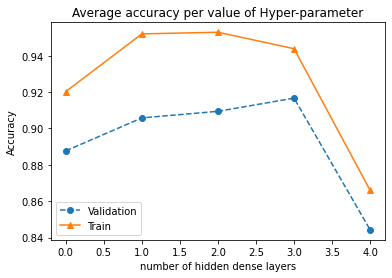

In [206]:
# PLotting the curves
plt.title('Average accuracy per value of Hyper-parameter')
plt.ylabel('Accuracy')
plt.plot(hidden_layer_list, validation_acc_list, linestyle='--', marker='o', label='Validation')
plt.plot(hidden_layer_list, training_acc_list, linestyle='-', marker='^',label='Train' )
plt.xlabel('Number of hidden dense layers')
plt.legend()
plt.show()

#### Figure 2 (Number of layers)

In [207]:
# Displaying the summary in a dataframe
results= pd.DataFrame({'Hidden Layers': hidden_layer_list,
                      'Training accuracy':training_acc_list,
                      'Validation accuracy': validation_acc_list})
results

,Hidden Layers,Training accuracy,Validation accuracy
0,0,0.920290,0.887681
1,1,0.951993,0.905797
2,2,0.952899,0.909420
3,3,0.943841,0.916667
4,4,0.865942,0.844203


The higher the number of hidden layers in the network enables the model to detect more patterns and hence learn better. But at the same time, a very deep network may cause overfitting and also increase the computational time and resources. 3 is selected because it has the highest validation accuracy with no signs of overfitting as the difference between the scores is not high.

### Hidden Units

In [209]:
validation_acc_list = [] # Stores the validation sparse categorical accuracy
training_acc_list = []# Stores the training sparse categorical accuracy

# Tuning the hidden units
for value in neurons_list:
    hidden_layers = 3
    neurons = value
    activation = 'relu'
    optimizer_type = 'Adam'
    

    # Build model
    inceptionnet = buildNetwork(n_neurons=neurons, 
                         n_hidden=hidden_layers, 
                         activation_func = activation, 
                         loss_func = 'sparse_categorical_crossentropy', 
                         optimizer = optimizer_type)
    

    # Fit model
    history = inceptionnet.fit(train_data_generator,
                           epochs = 5,
                           validation_data = val_data_generator,
                           verbose =2)
    


    training_acc_list.append(inceptionnet.evaluate(train_data_generator)[1])
    validation_acc_list.append(inceptionnet.evaluate(val_data_generator)[1])

Epoch 1/5


2022-05-10 14:02:53.997998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:03:25.223027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 47s - loss: 0.6335 - sparse_categorical_accuracy: 0.7536 - val_loss: 0.6357 - val_sparse_categorical_accuracy: 0.7572 - 47s/epoch - 1s/step
Epoch 2/5
35/35 - 32s - loss: 0.3060 - sparse_categorical_accuracy: 0.8895 - val_loss: 0.5104 - val_sparse_categorical_accuracy: 0.8080 - 32s/epoch - 908ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2442 - sparse_categorical_accuracy: 0.9212 - val_loss: 0.4148 - val_sparse_categorical_accuracy: 0.8514 - 31s/epoch - 887ms/step
Epoch 4/5
35/35 - 31s - loss: 0.2065 - sparse_categorical_accuracy: 0.9275 - val_loss: 0.3020 - val_sparse_categorical_accuracy: 0.8877 - 31s/epoch - 877ms/step
Epoch 5/5
35/35 - 31s - loss: 0.1870 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.2512 - val_sparse_categorical_accuracy: 0.8949 - 31s/epoch - 876ms/step
35/35 [==============================] - 7s 193ms/step - loss: 0.2715 - sparse_categorical_accuracy: 0.9058
Epoch 1/5


2022-05-10 14:06:26.172188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:06:57.560505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 50s - loss: 0.4581 - sparse_categorical_accuracy: 0.8179 - val_loss: 0.8758 - val_sparse_categorical_accuracy: 0.5580 - 50s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.2264 - sparse_categorical_accuracy: 0.9194 - val_loss: 0.6414 - val_sparse_categorical_accuracy: 0.6993 - 31s/epoch - 886ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2114 - sparse_categorical_accuracy: 0.9194 - val_loss: 0.3835 - val_sparse_categorical_accuracy: 0.8587 - 31s/epoch - 888ms/step
Epoch 4/5
35/35 - 31s - loss: 0.1832 - sparse_categorical_accuracy: 0.9312 - val_loss: 0.3341 - val_sparse_categorical_accuracy: 0.8696 - 31s/epoch - 886ms/step
Epoch 5/5
35/35 - 31s - loss: 0.1703 - sparse_categorical_accuracy: 0.9484 - val_loss: 0.3067 - val_sparse_categorical_accuracy: 0.8659 - 31s/epoch - 875ms/step
35/35 [==============================] - 7s 191ms/step - loss: 0.3048 - sparse_categorical_accuracy: 0.8804
Epoch 1/5


2022-05-10 14:09:55.390834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:10:27.470714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 48s - loss: 0.4471 - sparse_categorical_accuracy: 0.8288 - val_loss: 0.7945 - val_sparse_categorical_accuracy: 0.6667 - 48s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.2383 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8333 - 31s/epoch - 895ms/step
Epoch 3/5
35/35 - 31s - loss: 0.1925 - sparse_categorical_accuracy: 0.9384 - val_loss: 0.3975 - val_sparse_categorical_accuracy: 0.8370 - 31s/epoch - 873ms/step
Epoch 4/5
35/35 - 31s - loss: 0.1488 - sparse_categorical_accuracy: 0.9493 - val_loss: 0.3300 - val_sparse_categorical_accuracy: 0.8768 - 31s/epoch - 898ms/step
Epoch 5/5
35/35 - 31s - loss: 0.1301 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.2809 - val_sparse_categorical_accuracy: 0.9094 - 31s/epoch - 892ms/step
35/35 [==============================] - 7s 193ms/step - loss: 0.2641 - sparse_categorical_accuracy: 0.9022
Epoch 1/5


2022-05-10 14:13:28.766363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:14:02.981828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 52s - loss: 0.4351 - sparse_categorical_accuracy: 0.8406 - val_loss: 0.7934 - val_sparse_categorical_accuracy: 0.6449 - 52s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.2145 - sparse_categorical_accuracy: 0.9121 - val_loss: 0.6302 - val_sparse_categorical_accuracy: 0.7138 - 31s/epoch - 890ms/step
Epoch 3/5
35/35 - 31s - loss: 0.1750 - sparse_categorical_accuracy: 0.9402 - val_loss: 0.3514 - val_sparse_categorical_accuracy: 0.8623 - 31s/epoch - 899ms/step
Epoch 4/5
35/35 - 31s - loss: 0.1512 - sparse_categorical_accuracy: 0.9438 - val_loss: 0.2320 - val_sparse_categorical_accuracy: 0.8841 - 31s/epoch - 888ms/step
Epoch 5/5
35/35 - 31s - loss: 0.1708 - sparse_categorical_accuracy: 0.9411 - val_loss: 0.2637 - val_sparse_categorical_accuracy: 0.8949 - 31s/epoch - 892ms/step
35/35 [==============================] - 7s 198ms/step - loss: 0.3530 - sparse_categorical_accuracy: 0.8587


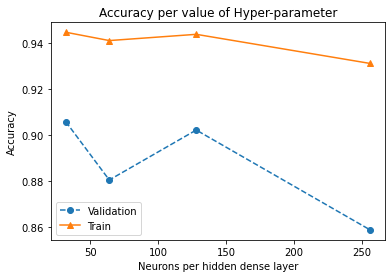

In [210]:
# PLotting the curves
plt.title('Accuracy per value of Hyper-parameter')
plt.ylabel('Accuracy')
plt.plot(neurons_list, validation_acc_list, linestyle='--', marker='o', label='Validation')
plt.plot(neurons_list, training_acc_list, linestyle='-', marker='^',label='Train' )
plt.xlabel('Neurons per hidden dense layer')
plt.legend()
plt.show()

#### Figure 3 (Hidden units)

In [211]:
results= pd.DataFrame({'Neurons': neurons_list,
                      'Training accuracy':training_acc_list,
                      'Validation accuracy': validation_acc_list})
results

,Neurons,Training accuracy,Validation accuracy
0,32,0.944746,0.905797
1,64,0.941123,0.880435
2,128,0.943841,0.902174
3,256,0.931159,0.858696


Similar to the number of layers, the number of nodes in a layer is also important. Too many could overfit the data by detecting unnecessary patterns among the variables itself while too few tend to result in a high bias due to under-fitting. In this case, we choose 32 as it has the highest training and validation score compared to the others. 

### Activation function

In [212]:
validation_acc_list = [] # Stores the validation sparse categorical accuracy
training_acc_list = [] # Stores teh training sparse categorical accuracy

# Tuning the activation fucntion
for value in activation_list:
    hidden_layers = 3
    neurons = 32
    activation = value
    optimizer_type = 'Adam'

    

    # Build model
    inceptionnet = buildNetwork(n_neurons=neurons, 
                         n_hidden=hidden_layers, 
                         activation_func = activation, 
                         loss_func = 'sparse_categorical_crossentropy', 
                         optimizer = optimizer_type)
    

    # Fit model
    history = inceptionnet.fit(train_data_generator,
                           epochs = 5,
                           validation_data = val_data_generator,
                           verbose =2)
    


    training_acc_list.append(inceptionnet.evaluate(train_data_generator)[1])
    validation_acc_list.append(inceptionnet.evaluate(val_data_generator)[1])

Epoch 1/5


2022-05-10 14:25:48.072629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:26:20.612229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 48s - loss: 0.7356 - sparse_categorical_accuracy: 0.6975 - val_loss: 1.0556 - val_sparse_categorical_accuracy: 0.3659 - 48s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.3898 - sparse_categorical_accuracy: 0.8922 - val_loss: 0.8762 - val_sparse_categorical_accuracy: 0.7899 - 31s/epoch - 874ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2913 - sparse_categorical_accuracy: 0.9257 - val_loss: 0.7166 - val_sparse_categorical_accuracy: 0.8732 - 31s/epoch - 887ms/step
Epoch 4/5
35/35 - 30s - loss: 0.2427 - sparse_categorical_accuracy: 0.9339 - val_loss: 0.5480 - val_sparse_categorical_accuracy: 0.8949 - 30s/epoch - 861ms/step
Epoch 5/5
35/35 - 30s - loss: 0.2128 - sparse_categorical_accuracy: 0.9411 - val_loss: 0.4383 - val_sparse_categorical_accuracy: 0.8986 - 30s/epoch - 870ms/step
35/35 [==============================] - 6s 180ms/step - loss: 0.4379 - sparse_categorical_accuracy: 0.8804
Epoch 1/5


2022-05-10 14:29:15.713206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:29:46.392172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 46s - loss: 0.5325 - sparse_categorical_accuracy: 0.7781 - val_loss: 0.7363 - val_sparse_categorical_accuracy: 0.6703 - 46s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.2805 - sparse_categorical_accuracy: 0.8995 - val_loss: 0.4452 - val_sparse_categorical_accuracy: 0.8188 - 31s/epoch - 885ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2217 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.3591 - val_sparse_categorical_accuracy: 0.8333 - 31s/epoch - 888ms/step
Epoch 4/5
35/35 - 30s - loss: 0.1709 - sparse_categorical_accuracy: 0.9339 - val_loss: 0.2892 - val_sparse_categorical_accuracy: 0.8804 - 30s/epoch - 866ms/step
Epoch 5/5
35/35 - 30s - loss: 0.1821 - sparse_categorical_accuracy: 0.9339 - val_loss: 0.2893 - val_sparse_categorical_accuracy: 0.8986 - 30s/epoch - 866ms/step
35/35 [==============================] - 7s 190ms/step - loss: 0.2854 - sparse_categorical_accuracy: 0.8877
Epoch 1/5


2022-05-10 14:32:42.019772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:33:13.712484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 47s - loss: 0.7286 - sparse_categorical_accuracy: 0.7174 - val_loss: 0.8653 - val_sparse_categorical_accuracy: 0.6341 - 47s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.3364 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.5812 - val_sparse_categorical_accuracy: 0.8007 - 31s/epoch - 881ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2581 - sparse_categorical_accuracy: 0.8995 - val_loss: 0.4538 - val_sparse_categorical_accuracy: 0.8406 - 31s/epoch - 878ms/step
Epoch 4/5
35/35 - 30s - loss: 0.2101 - sparse_categorical_accuracy: 0.9275 - val_loss: 0.3163 - val_sparse_categorical_accuracy: 0.8949 - 30s/epoch - 865ms/step
Epoch 5/5
35/35 - 30s - loss: 0.2345 - sparse_categorical_accuracy: 0.9221 - val_loss: 0.2920 - val_sparse_categorical_accuracy: 0.9275 - 30s/epoch - 865ms/step
35/35 [==============================] - 7s 185ms/step - loss: 0.2862 - sparse_categorical_accuracy: 0.8949
Epoch 1/5


2022-05-10 14:36:13.037205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:36:45.155678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 53s - loss: 0.4947 - sparse_categorical_accuracy: 0.8261 - val_loss: 0.5094 - val_sparse_categorical_accuracy: 0.8007 - 53s/epoch - 2s/step
Epoch 2/5
35/35 - 31s - loss: 0.2619 - sparse_categorical_accuracy: 0.9004 - val_loss: 0.3769 - val_sparse_categorical_accuracy: 0.8732 - 31s/epoch - 886ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2148 - sparse_categorical_accuracy: 0.9257 - val_loss: 0.3275 - val_sparse_categorical_accuracy: 0.9022 - 31s/epoch - 889ms/step
Epoch 4/5
35/35 - 31s - loss: 0.1763 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.2889 - val_sparse_categorical_accuracy: 0.8841 - 31s/epoch - 891ms/step
Epoch 5/5
35/35 - 30s - loss: 0.1535 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.2397 - val_sparse_categorical_accuracy: 0.9094 - 30s/epoch - 869ms/step
35/35 [==============================] - 7s 190ms/step - loss: 0.2256 - sparse_categorical_accuracy: 0.9022
Epoch 1/5


2022-05-10 14:39:45.321321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 14:40:16.807229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 48s - loss: 0.8722 - sparse_categorical_accuracy: 0.6431 - val_loss: 0.4610 - val_sparse_categorical_accuracy: 0.8514 - 48s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.3257 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3261 - val_sparse_categorical_accuracy: 0.8659 - 31s/epoch - 889ms/step
Epoch 3/5
35/35 - 30s - loss: 0.2525 - sparse_categorical_accuracy: 0.9067 - val_loss: 0.2985 - val_sparse_categorical_accuracy: 0.9058 - 30s/epoch - 866ms/step
Epoch 4/5
35/35 - 30s - loss: 0.2440 - sparse_categorical_accuracy: 0.9067 - val_loss: 0.2962 - val_sparse_categorical_accuracy: 0.8877 - 30s/epoch - 869ms/step
Epoch 5/5
35/35 - 31s - loss: 0.2242 - sparse_categorical_accuracy: 0.9212 - val_loss: 0.2181 - val_sparse_categorical_accuracy: 0.9094 - 31s/epoch - 875ms/step
35/35 [==============================] - 7s 193ms/step - loss: 0.2342 - sparse_categorical_accuracy: 0.9239


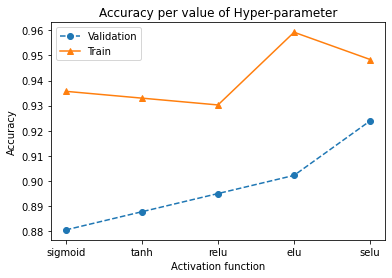

In [213]:
# PLotting the curves
plt.title('Accuracy per value of Hyper-parameter')
plt.ylabel('Accuracy')
plt.plot(activation_list, validation_acc_list, linestyle='--', marker='o', label='Validation')
plt.plot(activation_list, training_acc_list, linestyle='-', marker='^',label='Train' )
plt.xlabel('Activation function')
plt.legend()
plt.show()

#### Figure 4 (activation functions)

In [214]:
results= pd.DataFrame({'Activation function': activation_list,
                      'Training accuracy':training_acc_list,
                      'Validation accuracy': validation_acc_list})
results

,Activation function,Training accuracy,Validation accuracy
0,sigmoid,0.935688,0.880435
1,tanh,0.932971,0.887681
2,relu,0.930254,0.894928
3,elu,0.959239,0.902174
4,selu,0.948370,0.923913


Selected parameter: ‘selu’
The major advantage of using SELU is that it provides self-normalization (that is output from SELU activation will preserve the mean of 0 and standard deviation of 1) and this solves the vanishing or exploding gradients problem. Selu is selected because it results in the best validation score due to its self normalising behaviour.

### Optimizer

In [218]:
validation_acc_list = [] # Stores the validation sparse categorical accuracy
training_acc_list = [] # Stores teh training sparse categorical accuracy

# Tuning the optimizer
for value in optimizer_type_list:
    hidden_layers = 3
    neurons = 32
    activation = 'selu'
    optimizer_type = value
    

    # Build model
    inceptionnet = buildNetwork(n_neurons=neurons, 
                         n_hidden=hidden_layers, 
                         activation_func = activation, 
                         loss_func = 'sparse_categorical_crossentropy', 
                         optimizer = optimizer_type)
    

    # Fit model
    history = inceptionnet.fit(train_data_generator,
                           epochs = 5,
                           validation_data = val_data_generator,
                           verbose =2)
    


    training_acc_list.append(inceptionnet.evaluate(train_data_generator)[1])
    validation_acc_list.append(inceptionnet.evaluate(val_data_generator)[1])

Epoch 1/5


2022-05-10 15:03:21.384559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:03:52.750583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 47s - loss: 1.0043 - sparse_categorical_accuracy: 0.6078 - val_loss: 0.5667 - val_sparse_categorical_accuracy: 0.8043 - 47s/epoch - 1s/step
Epoch 2/5
35/35 - 31s - loss: 0.3906 - sparse_categorical_accuracy: 0.8696 - val_loss: 0.4220 - val_sparse_categorical_accuracy: 0.8478 - 31s/epoch - 897ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2922 - sparse_categorical_accuracy: 0.8958 - val_loss: 0.3165 - val_sparse_categorical_accuracy: 0.8768 - 31s/epoch - 881ms/step
Epoch 4/5
35/35 - 31s - loss: 0.2487 - sparse_categorical_accuracy: 0.9004 - val_loss: 0.2717 - val_sparse_categorical_accuracy: 0.9130 - 31s/epoch - 884ms/step
Epoch 5/5
35/35 - 31s - loss: 0.2284 - sparse_categorical_accuracy: 0.9158 - val_loss: 0.3202 - val_sparse_categorical_accuracy: 0.8841 - 31s/epoch - 872ms/step
35/35 [==============================] - 7s 184ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.8696
Epoch 1/5


2022-05-10 15:06:53.213650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:07:25.449601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 50s - loss: 0.8443 - sparse_categorical_accuracy: 0.6830 - val_loss: 0.4494 - val_sparse_categorical_accuracy: 0.8188 - 50s/epoch - 1s/step
Epoch 2/5
35/35 - 32s - loss: 0.4261 - sparse_categorical_accuracy: 0.8225 - val_loss: 0.3798 - val_sparse_categorical_accuracy: 0.8659 - 32s/epoch - 921ms/step
Epoch 3/5
35/35 - 31s - loss: 0.3522 - sparse_categorical_accuracy: 0.8623 - val_loss: 0.2927 - val_sparse_categorical_accuracy: 0.8877 - 31s/epoch - 898ms/step
Epoch 4/5
35/35 - 31s - loss: 0.2786 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.3332 - val_sparse_categorical_accuracy: 0.8587 - 31s/epoch - 873ms/step
Epoch 5/5
35/35 - 31s - loss: 0.3008 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.3298 - val_sparse_categorical_accuracy: 0.8768 - 31s/epoch - 888ms/step
35/35 [==============================] - 7s 194ms/step - loss: 0.3317 - sparse_categorical_accuracy: 0.8768
Epoch 1/5


2022-05-10 15:10:29.689540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:11:00.988078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 48s - loss: 0.8426 - sparse_categorical_accuracy: 0.6178 - val_loss: 0.6001 - val_sparse_categorical_accuracy: 0.7971 - 48s/epoch - 1s/step
Epoch 2/5
35/35 - 32s - loss: 0.5337 - sparse_categorical_accuracy: 0.8043 - val_loss: 0.5200 - val_sparse_categorical_accuracy: 0.8152 - 32s/epoch - 902ms/step
Epoch 3/5
35/35 - 31s - loss: 0.4648 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.4707 - val_sparse_categorical_accuracy: 0.8406 - 31s/epoch - 891ms/step
Epoch 4/5
35/35 - 31s - loss: 0.3906 - sparse_categorical_accuracy: 0.8668 - val_loss: 0.4285 - val_sparse_categorical_accuracy: 0.8370 - 31s/epoch - 879ms/step
Epoch 5/5
35/35 - 31s - loss: 0.3487 - sparse_categorical_accuracy: 0.8804 - val_loss: 0.4143 - val_sparse_categorical_accuracy: 0.8442 - 31s/epoch - 888ms/step
35/35 [==============================] - 7s 185ms/step - loss: 0.4090 - sparse_categorical_accuracy: 0.8768
Epoch 1/5


2022-05-10 15:14:02.013819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:14:34.063247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 49s - loss: 1.4540 - sparse_categorical_accuracy: 0.2763 - val_loss: 1.4349 - val_sparse_categorical_accuracy: 0.2500 - 49s/epoch - 1s/step
Epoch 2/5
35/35 - 32s - loss: 1.3817 - sparse_categorical_accuracy: 0.2509 - val_loss: 1.3556 - val_sparse_categorical_accuracy: 0.2500 - 32s/epoch - 908ms/step
Epoch 3/5
35/35 - 31s - loss: 1.3618 - sparse_categorical_accuracy: 0.2437 - val_loss: 1.3117 - val_sparse_categorical_accuracy: 0.2717 - 31s/epoch - 884ms/step
Epoch 4/5
35/35 - 31s - loss: 1.3354 - sparse_categorical_accuracy: 0.2563 - val_loss: 1.3048 - val_sparse_categorical_accuracy: 0.2717 - 31s/epoch - 878ms/step
Epoch 5/5
35/35 - 31s - loss: 1.2896 - sparse_categorical_accuracy: 0.2708 - val_loss: 1.2159 - val_sparse_categorical_accuracy: 0.2971 - 31s/epoch - 880ms/step
35/35 [==============================] - 6s 182ms/step - loss: 1.2711 - sparse_categorical_accuracy: 0.2717
Epoch 1/5


2022-05-10 15:17:35.723568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:18:14.086957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 56s - loss: 0.6969 - sparse_categorical_accuracy: 0.7237 - val_loss: 0.3817 - val_sparse_categorical_accuracy: 0.8478 - 56s/epoch - 2s/step
Epoch 2/5
35/35 - 31s - loss: 0.3050 - sparse_categorical_accuracy: 0.8850 - val_loss: 0.3390 - val_sparse_categorical_accuracy: 0.8732 - 31s/epoch - 880ms/step
Epoch 3/5
35/35 - 32s - loss: 0.2677 - sparse_categorical_accuracy: 0.9049 - val_loss: 0.2569 - val_sparse_categorical_accuracy: 0.9022 - 32s/epoch - 902ms/step
Epoch 4/5
35/35 - 31s - loss: 0.2424 - sparse_categorical_accuracy: 0.9158 - val_loss: 0.3247 - val_sparse_categorical_accuracy: 0.8804 - 31s/epoch - 898ms/step
Epoch 5/5
35/35 - 32s - loss: 0.2168 - sparse_categorical_accuracy: 0.9203 - val_loss: 0.2260 - val_sparse_categorical_accuracy: 0.9167 - 32s/epoch - 923ms/step
35/35 [==============================] - 7s 195ms/step - loss: 0.2188 - sparse_categorical_accuracy: 0.9275


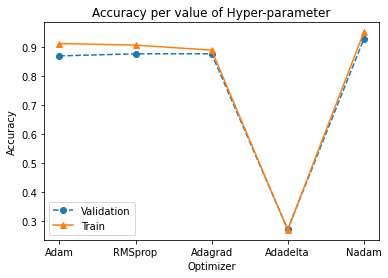

In [219]:
# PLotting the curves
plt.title('Accuracy per value of Hyper-parameter')
plt.ylabel('Accuracy')
plt.plot(optimizer_type_list, validation_acc_list, linestyle='--', marker='o', label='Validation')
plt.plot(optimizer_type_list, training_acc_list, linestyle='-', marker='^',label='Train' )
plt.xlabel('Optimizer')
plt.legend()
plt.show()

#### Figure 5 (optimizers)

In [220]:
results= pd.DataFrame({'Optimizer': optimizer_type_list,
                      'Training accuracy':training_acc_list,
                      'Validation accuracy': validation_acc_list})
results

,Optimizer,Training accuracy,Validation accuracy
0,Adam,0.912138,0.869565
1,RMSprop,0.906703,0.876812
2,Adagrad,0.889493,0.876812
3,Adadelta,0.269928,0.271739
4,Nadam,0.951087,0.927536


Nadam is the best optimiser for this task as is indicated by its high training and validation score. This basically combines the advantages of Adam with that of using the Nesterov momentum.

### Initial Learning rate

In [221]:
validation_acc_list = [] # Stores the validation sparse categorical accuracy
training_acc_list = [] # Stores teh training sparse categorical accuracy

# Tuining the learning rate
for value in lr_list:
    hidden_layers = 3
    neurons = 32
    activation = 'selu'
    lr = value
    optimizer_type = tf.keras.optimizers.Nadam(learning_rate = lr)
    

    # Build model
    inceptionnet = buildNetwork(n_neurons=neurons, 
                         n_hidden=hidden_layers, 
                         learning_rate = lr,
                         activation_func = activation, 
                         loss_func = 'sparse_categorical_crossentropy', 
                         optimizer = optimizer_type)
    

    # Fit model
    history = inceptionnet.fit(train_data_generator,
                           epochs = 5,
                           validation_data = val_data_generator,
                           verbose =2)
    


    training_acc_list.append(inceptionnet.evaluate(train_data_generator)[1])
    validation_acc_list.append(inceptionnet.evaluate(val_data_generator)[1])

Epoch 1/5


2022-05-10 15:24:20.898718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:24:58.619446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 58s - loss: 12.4399 - sparse_categorical_accuracy: 0.3623 - val_loss: 31.3285 - val_sparse_categorical_accuracy: 0.3188 - 58s/epoch - 2s/step
Epoch 2/5
35/35 - 32s - loss: 4.7451 - sparse_categorical_accuracy: 0.3261 - val_loss: 1.1145 - val_sparse_categorical_accuracy: 0.3370 - 32s/epoch - 920ms/step
Epoch 3/5
35/35 - 32s - loss: 1.1258 - sparse_categorical_accuracy: 0.3614 - val_loss: 1.1818 - val_sparse_categorical_accuracy: 0.3188 - 32s/epoch - 923ms/step
Epoch 4/5
35/35 - 32s - loss: 1.1789 - sparse_categorical_accuracy: 0.3270 - val_loss: 1.1199 - val_sparse_categorical_accuracy: 0.3370 - 32s/epoch - 902ms/step
Epoch 5/5
35/35 - 31s - loss: 1.1706 - sparse_categorical_accuracy: 0.3569 - val_loss: 1.2106 - val_sparse_categorical_accuracy: 0.3370 - 31s/epoch - 891ms/step
35/35 [==============================] - 7s 204ms/step - loss: 1.2106 - sparse_categorical_accuracy: 0.3370
Epoch 1/5


2022-05-10 15:28:05.270285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:28:42.318896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 54s - loss: 1.4157 - sparse_categorical_accuracy: 0.5915 - val_loss: 0.5860 - val_sparse_categorical_accuracy: 0.7717 - 54s/epoch - 2s/step
Epoch 2/5
35/35 - 32s - loss: 0.4119 - sparse_categorical_accuracy: 0.8342 - val_loss: 0.3605 - val_sparse_categorical_accuracy: 0.8551 - 32s/epoch - 904ms/step
Epoch 3/5
35/35 - 31s - loss: 0.3483 - sparse_categorical_accuracy: 0.8623 - val_loss: 0.4143 - val_sparse_categorical_accuracy: 0.8442 - 31s/epoch - 881ms/step
Epoch 4/5
35/35 - 32s - loss: 0.2645 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.2766 - val_sparse_categorical_accuracy: 0.8804 - 32s/epoch - 904ms/step
Epoch 5/5
35/35 - 32s - loss: 1.0439 - sparse_categorical_accuracy: 0.7237 - val_loss: 0.4247 - val_sparse_categorical_accuracy: 0.8080 - 32s/epoch - 904ms/step
35/35 [==============================] - 7s 182ms/step - loss: 0.4433 - sparse_categorical_accuracy: 0.7862
Epoch 1/5


2022-05-10 15:31:49.577988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:32:23.964795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 54s - loss: 0.6291 - sparse_categorical_accuracy: 0.7545 - val_loss: 0.4082 - val_sparse_categorical_accuracy: 0.8297 - 54s/epoch - 2s/step
Epoch 2/5
35/35 - 31s - loss: 0.3267 - sparse_categorical_accuracy: 0.8786 - val_loss: 0.3119 - val_sparse_categorical_accuracy: 0.8913 - 31s/epoch - 897ms/step
Epoch 3/5
35/35 - 31s - loss: 0.2986 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3798 - val_sparse_categorical_accuracy: 0.8297 - 31s/epoch - 895ms/step
Epoch 4/5
35/35 - 32s - loss: 0.2295 - sparse_categorical_accuracy: 0.9121 - val_loss: 0.2985 - val_sparse_categorical_accuracy: 0.8841 - 32s/epoch - 917ms/step
Epoch 5/5
35/35 - 31s - loss: 0.2395 - sparse_categorical_accuracy: 0.9121 - val_loss: 0.2160 - val_sparse_categorical_accuracy: 0.9203 - 31s/epoch - 895ms/step
35/35 [==============================] - 7s 203ms/step - loss: 0.2802 - sparse_categorical_accuracy: 0.8913
Epoch 1/5


2022-05-10 15:35:28.181968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-10 15:36:01.878221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 - 56s - loss: 0.9392 - sparse_categorical_accuracy: 0.5471 - val_loss: 0.6401 - val_sparse_categorical_accuracy: 0.7754 - 56s/epoch - 2s/step
Epoch 2/5
35/35 - 32s - loss: 0.5159 - sparse_categorical_accuracy: 0.8170 - val_loss: 0.4813 - val_sparse_categorical_accuracy: 0.8333 - 32s/epoch - 922ms/step
Epoch 3/5
35/35 - 31s - loss: 0.4059 - sparse_categorical_accuracy: 0.8623 - val_loss: 0.4423 - val_sparse_categorical_accuracy: 0.8225 - 31s/epoch - 886ms/step
Epoch 4/5
35/35 - 31s - loss: 0.3480 - sparse_categorical_accuracy: 0.8795 - val_loss: 0.3549 - val_sparse_categorical_accuracy: 0.8949 - 31s/epoch - 886ms/step
Epoch 5/5
35/35 - 31s - loss: 0.3229 - sparse_categorical_accuracy: 0.8732 - val_loss: 0.3715 - val_sparse_categorical_accuracy: 0.8696 - 31s/epoch - 886ms/step
35/35 [==============================] - 7s 197ms/step - loss: 0.3737 - sparse_categorical_accuracy: 0.8623


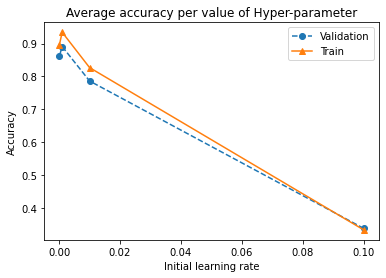

In [224]:
# Plotting the curves
plt.title('Average accuracy per value of Hyper-parameter')
plt.ylabel('Accuracy')
plt.plot(lr_list, validation_acc_list, linestyle='--', marker='o', label='Validation')
plt.plot(lr_list, training_acc_list, linestyle='-', marker='^',label='Train' )
plt.plot()
plt.xlabel('Initial learning rate')
plt.legend()
plt.show()

#### Figure 6 (Inintial learning rate)

In [223]:
results= pd.DataFrame({'Initial learning rate': lr_list,
                      'Training accuracy':training_acc_list,
                      'Validation accuracy': validation_acc_list})
results

,Initial learning rate,Training accuracy,Validation accuracy
0,0.1000,0.332428,0.336957
1,0.0100,0.826993,0.786232
2,0.0010,0.934783,0.891304
3,0.0001,0.896739,0.862319


We will be using a learning rate scheduler while training the final model [5]. This helps take advantage of the high initial learning rate at the beginning and progressively drops its value as training goes on resulting in a fine-tuned search for the minimum. The best initial value seems to be 0.001 which is the second smallest value among the chosen ones with the highest training and validation scores. The reason for this is that since it is a pre-trained model not much learning is required and so a smaller learning rate is better.


## Final model
For the final model we choose the following parameters:

Hidden layers = 3, 

Hidden Units = 32

Activation function = ‘selu’, 

Optimiser = ‘Nadam’

Loss function = ‘sparse_categorical_crossentropy',				

Initial Learning rate = 0.001, 

batch size = 32


### The final model was trained in two stages

##### Stage 1
The InceptionV3 model was loaded along with the imagenet weights and without the top layer. All the layers of the pre-trained model were locked in order to prevent any changes to the weights. A global average pooling layer was applied on top of this model followed by 3 layers of 32 dense hidden units with a ‘selu’ activation function. Finally, the last softmax layer was added with three outputs as we have three classes. The model is then compiled with optimiser as Nadam and loss function as sparse categorical cross-entropy. It was then trained with a 0.001 learning rate with batch size 32 for 5 epochs. We follow this method of training in the first stage because all the lower layers have been trained to detect low-level features but the topmost dense layers have been newly added and the weights are newly initialised. By allowing the model to train with the low layers locked the dense network will learn to detect patterns in the low-level features which have been already learnt when the pre-trained model was trained on the ImageNet dataset. It also has the added advantage of greatly reducing training time and resources as we don’t have to update the weights of the lower layers which would otherwise take hours to train. The training metrics are shown in the plot. There is a significant drop in the training and validation loss and a rise in the training and validation accuracy and no signs of overfitting as the difference between the validation and trining accuracy is very small at the end of training. The training and validation accuracy at the end of this stage was 0.9031 and 0.8913 respectively while the training and validation loss were clocked at 0.2444 and 0.249 respectively.


In [245]:
pretrained_model = tf.keras.applications.InceptionV3( 
                                               weights = 'imagenet', 
                                               include_top = False)

In [246]:
# Locking the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

In [247]:
# initialising and compiling the custom model
inceptionnet = buildNetwork(n_neurons=32, 
                         n_hidden=3, 
                         activation_func = 'selu', 
                         loss_func = 'sparse_categorical_crossentropy', 
                         optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001))

# Stops the training if the validation accuracy does not improve for 5 consecutive epochs
early_stop = tf.keras.callbacks.EarlyStopping(patience = 4,
                                              monitor = 'val_sparse_categorical_accuracy',
                                              mode = 'max',
                                              restore_best_weights = True)

# Saves the model in a .hdf5 files with the best weights
checkpoint = tf.keras.callbacks.ModelCheckpoint('InceptionModel.h5',
                                                monitor = 'val_sparse_categorical_accuracy',
                                                mode = 'max',
                                                save_best_only = True)

# lr scheduling reduced the learning rate by 0.5 if val loss does not decrease for 5 consecutive epochs
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, 
                                                    patience = 5,
                                                   monitor = 'val_loss',
                                                   mode = 'min')

# Training the model
history = inceptionnet.fit(train_data_generator,
                           epochs = 5,
                           validation_data = val_data_generator,
                           callbacks = [early_stop, checkpoint, lr_scheduler],
                           verbose =1)

Epoch 1/5


2022-05-10 16:01:14.917917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 0.7114 - sparse_categorical_accuracy: 0.7346

2022-05-10 16:01:52.403493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 60s 1s/step - loss: 0.7114 - sparse_categorical_accuracy: 0.7346 - val_loss: 0.4899 - val_sparse_categorical_accuracy: 0.8188 - lr: 0.0010
Epoch 2/5
35/35 [==============================] - 32s 897ms/step - loss: 0.3539 - sparse_categorical_accuracy: 0.8487 - val_loss: 0.3315 - val_sparse_categorical_accuracy: 0.8478 - lr: 0.0010
Epoch 3/5
35/35 [==============================] - 32s 905ms/step - loss: 0.2652 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.2648 - val_sparse_categorical_accuracy: 0.8913 - lr: 0.0010
Epoch 4/5
35/35 [==============================] - 31s 901ms/step - loss: 0.2444 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.2749 - val_sparse_categorical_accuracy: 0.8913 - lr: 0.0010
Epoch 5/5
35/35 [==============================] - 31s 886ms/step - loss: 0.2078 - sparse_categorical_accuracy: 0.9203 - val_loss: 0.2811 - val_sparse_categorical_accuracy: 0.8841 - lr: 0.0010


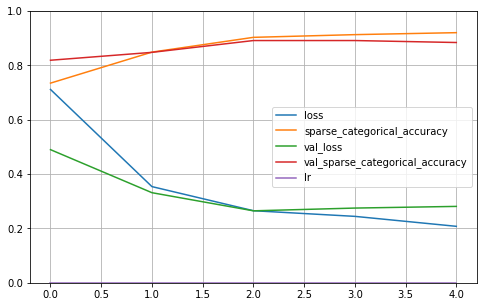

In [248]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Figure 7 (Training and validation metrics for the model for the first stage of training)

##### Stage 2
For stage 2 all the layers of the model are unlocked and allowed to train. Although the weights in the lower layers are already at the optimal values they need to be trained for a few epochs on our current dataset for fine-tuning. This stage will take much more time per epoch but the training will require only a few epochs to reach the optimal state. From the plot, we see that the training ends in 5 epochs as the early stopping callback kicks in and ends the training as it detects no further improvement in the validation accuracy. From curves, we see that although not much there is a slight improvement in the accuracy and reduction in the training and validation loss from where the model had left off in stage 1. The training and validation accuracy at the end of this stage was 0.9429 and 0.9058 respectively while the training and validation loss were clocked at 0.1660 and 0.2588 respectively.


In [249]:
# Unlocking all the layers for training
for layer in inceptionnet.layers:
    layer.trainable = True

In [250]:
# training the model again
history = inceptionnet.fit(train_data_generator,
                           epochs = 100,
                           validation_data = val_data_generator,
                           callbacks = [early_stop, checkpoint, lr_scheduler],
                           verbose =1)

Epoch 1/100
35/35 [==============================] - 31s 899ms/step - loss: 0.2305 - sparse_categorical_accuracy: 0.9176 - val_loss: 0.2363 - val_sparse_categorical_accuracy: 0.9130 - lr: 0.0010
Epoch 2/100
35/35 [==============================] - 31s 882ms/step - loss: 0.1912 - sparse_categorical_accuracy: 0.9384 - val_loss: 0.2758 - val_sparse_categorical_accuracy: 0.8949 - lr: 0.0010
Epoch 3/100
35/35 [==============================] - 31s 896ms/step - loss: 0.1959 - sparse_categorical_accuracy: 0.9230 - val_loss: 0.2643 - val_sparse_categorical_accuracy: 0.8986 - lr: 0.0010
Epoch 4/100
35/35 [==============================] - 31s 889ms/step - loss: 0.1940 - sparse_categorical_accuracy: 0.9158 - val_loss: 0.2321 - val_sparse_categorical_accuracy: 0.9058 - lr: 0.0010
Epoch 5/100
35/35 [==============================] - 31s 876ms/step - loss: 0.1859 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.2072 - val_sparse_categorical_accuracy: 0.9130 - lr: 0.0010


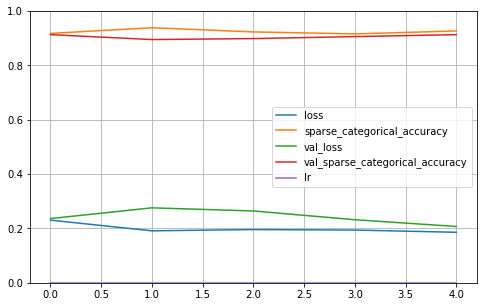

In [251]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Figure 8 (Training and validation metrics plot for the second stage of training)

### Training metrics

In [252]:
inceptionnet.evaluate(train_data_generator)

35/35 [==============================] - 31s 792ms/step - loss: 0.1661 - sparse_categorical_accuracy: 0.9429


[0.16605442762374878, 0.9429348111152649]

In [253]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = inceptionnet.predict(train_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

2022-05-10 16:07:27.638930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [254]:
confusion_matrix(train_data_generator.classes, y_train_pred)

array([[358,   3,   4],
       [  3, 321,  43],
       [  1,  11, 360]])

In [255]:
p = precision_score(train_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(train_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(train_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

precision:  0.9438933719959529
recall:  0.941074417945683
F1 score:  0.9412203715749511


### Validation metrics

In [256]:
inceptionnet.evaluate(val_data_generator)

35/35 [==============================] - 6s 181ms/step - loss: 0.2588 - sparse_categorical_accuracy: 0.9058


[0.25880205631256104, 0.9057971239089966]

In [257]:
y_val_pred = inceptionnet.predict(val_data_generator)
y_val_pred = np.argmax(y_val_pred,axis=1)

In [258]:
confusion_matrix(val_data_generator.classes, y_val_pred)

array([[91,  2,  2],
       [ 4, 82,  7],
       [ 1,  3, 84]])

In [259]:
p = precision_score(val_data_generator.classes, y_val_pred, average = 'macro')
r = recall_score(val_data_generator.classes, y_val_pred, average = 'macro')
f = f1_score(val_data_generator.classes, y_val_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

precision:  0.9312237362501544
recall:  0.9313868738316956
F1 score:  0.9307224959476846


### Testing metrics

In [260]:
inceptionnet.evaluate(test_data_generator)

161/161 [==============================] - 15s 91ms/step - loss: 0.1964 - sparse_categorical_accuracy: 0.9270


[0.1963651180267334, 0.9270186424255371]

In [261]:
y_test_pred = inceptionnet.predict(test_data_generator)
y_test_pred = np.argmax(y_test_pred,axis=1)

In [262]:
confusion_matrix(test_data_generator.classes, y_test_pred)

array([[105,   5,   6],
       [  2, 286,  29],
       [  8,  44, 803]])

In [263]:
p = precision_score(test_data_generator.classes, y_test_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_test_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_test_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

precision:  0.9083362372530829
recall:  0.9155206340785185
F1 score:  0.9116678180234724


We see that our model performs very well on the test data as well with all metrics above 90% values. Comparing these results to the previous results obtained by evaluating the pre-trained models on the dataset directly without customising it, we see that there is a significant amount of improvement in terms of classification accuracy which rose steeply from about 33% to just over 90% for the new model. The precision and recall and f-score for our final model are also greater than 90%. But among all these metrics we focus our attention on the recall. Our task in this project is to assist Radiologists in detecting COVID19 by analysing the Chest X-rays of patients in an attempt to detect the disease early so that it is possible to advise the patient to isolate it so as to prevent the spread of the virus to other people. The reason for this is that even if we detect a false positive it's okay as even if the patient doesn’t not have COVID19, we could just advise the patient to isolate at home greatly reducing the risk of spreading the virus which would otherwise be high if the model detects false negatives (in case of a model with low recall) as the sick patient would be allowed to go free without isolation. Our final model which has a recall of 91.55% on the test data proves that it is the best model for the task.